<a href="https://colab.research.google.com/github/amalmon/hotel-booking-data-analysis/blob/main/individual_note_AMALKRISHNA_N_hotel_booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
%lsmagic


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
Data_frame = pd.read_csv('/content/drive/MyDrive/Almabetter/CAPSTONE-PROJECT-1-EDA/Hotel Bookings.csv')

In [5]:
Data_df = Data_frame.copy()

In [6]:
Data_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
Data_df.shape

(119390, 32)

In [8]:
Data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
Data_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [10]:
Data_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**1. non canceled v/s canceled**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


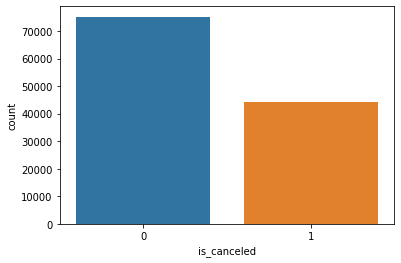

In [11]:
sns.countplot('is_canceled',data = Data_df)

0 - not_canceled

1 - is_canceled





*   confirmed or non canceled booking is more than canceled booking




# **2. MARKET SEGMENTATION**

In [15]:
#counting number of booking through each market segment
market_seg=Data_df.groupby(['market_segment']).count()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


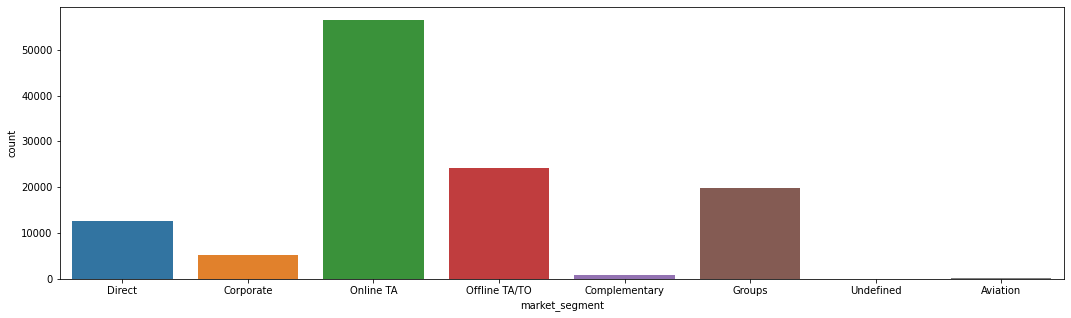

In [16]:
#to graphical representation
sns.countplot('market_segment',data = Data_df)
plt.rcParams['figure.figsize'] = (18, 5)



*   most bookings are happening through online



# **3.CANCELLATION v/s CUSTOMER TYPE**

In [17]:
#creating canceled data set
cancelled_df=Data_df['is_canceled'] == 1

In [ ]:
cancelled_df

In [ ]:
cancelled_df[cancelled_df==True]

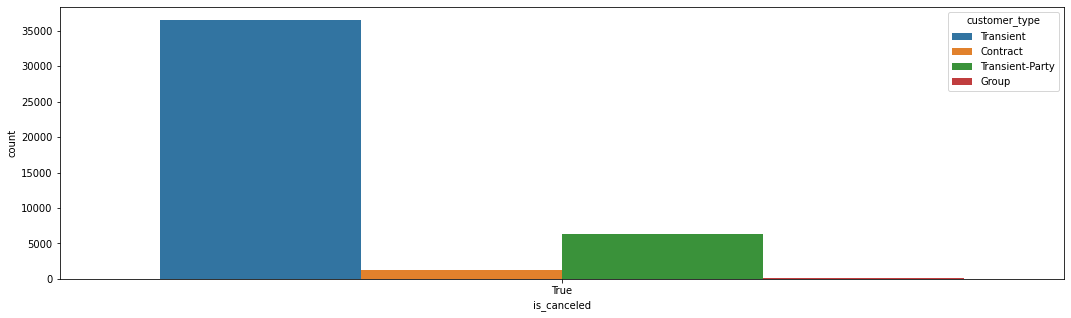

In [18]:
sns.countplot(x=cancelled_df[cancelled_df==True],hue=Data_df['customer_type'])



*   transient type customers cancel bookings most





# **4. cancellation v/s marketsegment**

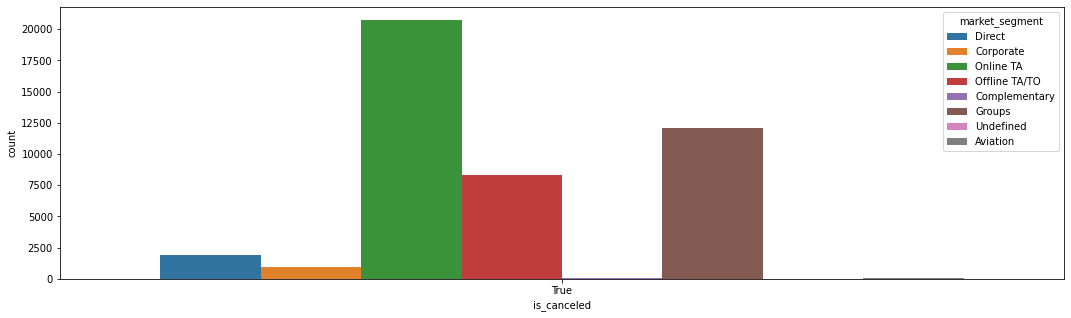

In [19]:
sns.countplot(x=cancelled_df[cancelled_df==True],hue=Data_df['market_segment'])




*  same as most booking market segment, most cancellation also through online market segments



# **5. CANCELLATION V/S MONTH**

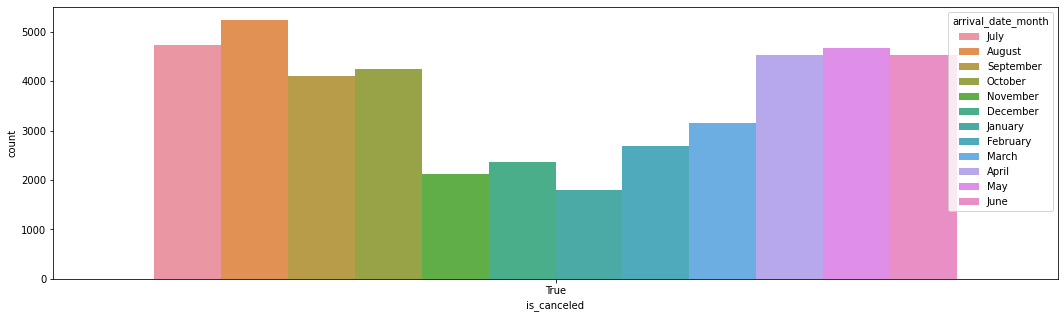

In [20]:
sns.countplot(x=cancelled_df[cancelled_df==True],hue=Data_df['arrival_date_month'])

# **6. Not cancelled customers monthwise**

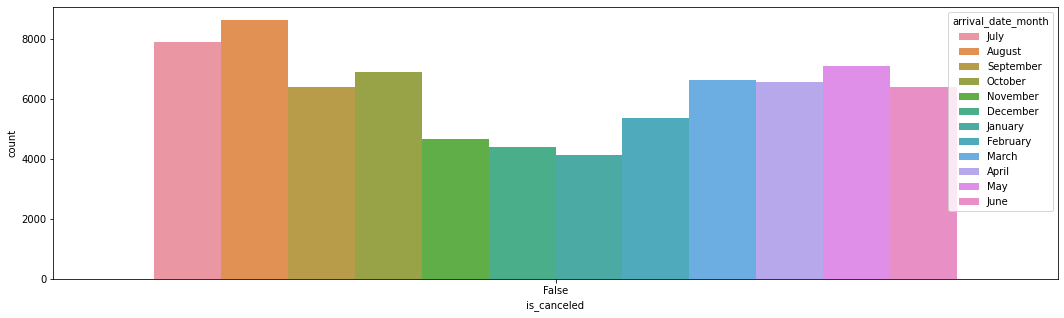

In [21]:
sns.countplot(x=cancelled_df[cancelled_df==False],hue=Data_df['arrival_date_month'])

In [ ]:
Data_df['is_canceled'].count()

119390

# **7. WHICH IS THE MOST BUSY BOOKING MONTH**

In [22]:
#making non canceled data frame
df_not_canceled = Data_df[Data_df['is_canceled']==0]

In [23]:
#find total monthly non canceled booking counts
monthly_booking= df_not_canceled["arrival_date_month"].value_counts()

In [24]:
#sorting values , reindexing & assigining to new variable
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_booking_vol=monthly_booking.reindex(new_order)

Text(0.5, 0, 'Month')

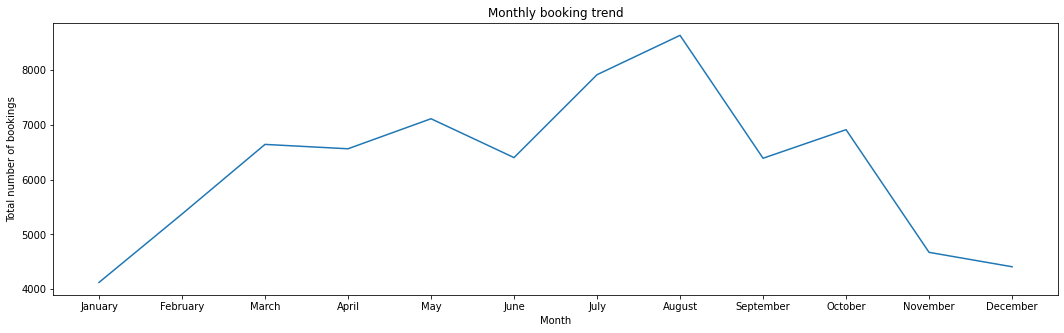

In [25]:
# Create the plot object
plt.plot(monthly_booking_vol)
plt.title('Monthly booking trend')
plt.ylabel('Total number of bookings')
plt.xlabel('Month')



*   most bookings are in August



# **8. BOOKING RUSH COMPARISON B/W CTIY HOTEL AND RESORT HOTEL**

In [26]:
monthly_booking_by_hoteltyp =df_not_canceled.groupby(['arrival_date_month','hotel'])['arrival_date_month'].count().unstack()

In [27]:
monthly_booking_by_hoteltyp=monthly_booking_by_hoteltyp.reindex(new_order)

In [28]:
monthly_booking_by_hoteltyp

hotel,City Hotel,Resort Hotel
arrival_date_month,,
January,2254,1868
February,3064,2308
March,4072,2573
April,4015,2550
May,4579,2535
June,4366,2038
July,4782,3137
August,5381,3257
September,4290,2102


Text(0.5, 0, 'month')

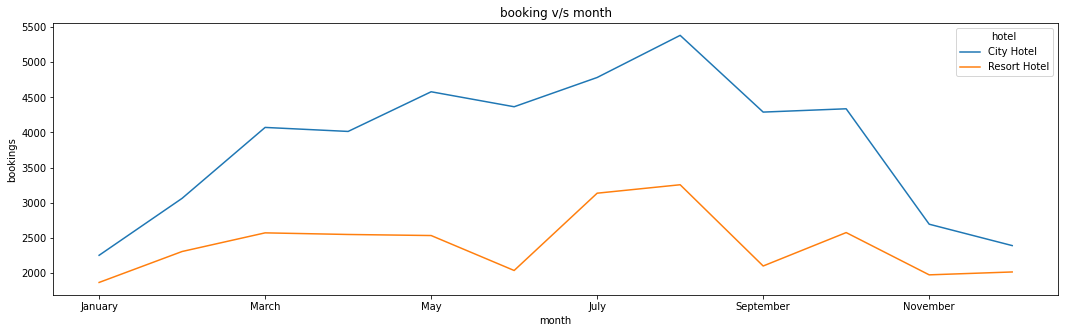

In [29]:
monthly_booking_by_hoteltyp.plot()
plt.title('booking v/s month')
plt.ylabel('bookings')
plt.xlabel('month')


# **9. AVERAGE DAILY RATE**

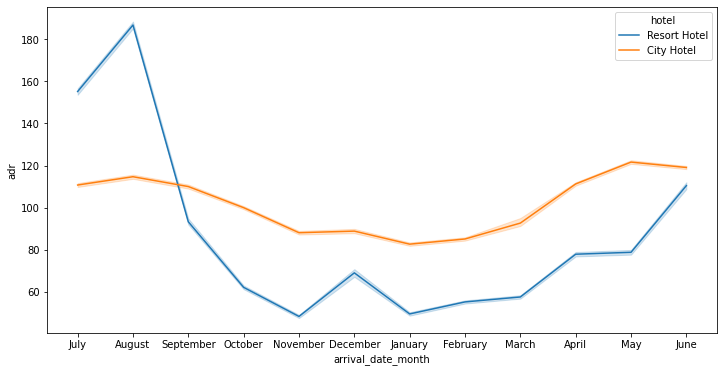

In [30]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month',y='adr',hue='hotel',data=Data_df)

# **10. FROM WHICH COUNTRY HAVE MOST BOOKINGS**

In [31]:
country_df=Data_df['country'].value_counts()

In [32]:
top_5=country_df.head()

Text(0.5, 0, 'country')

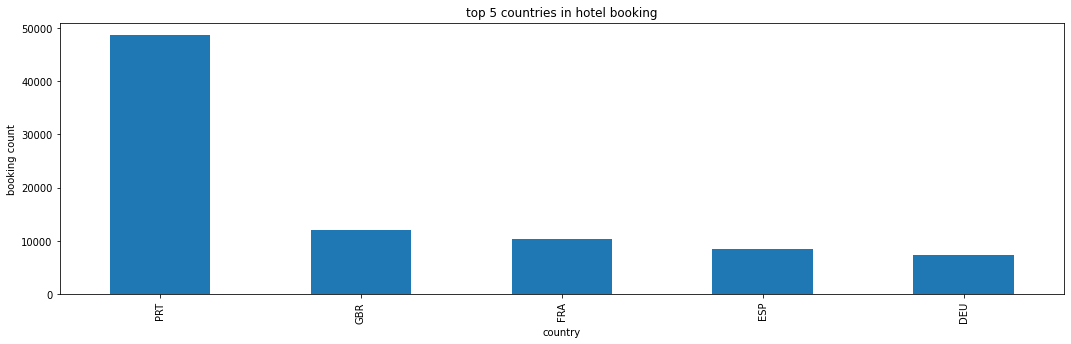

In [33]:
top_5.plot(kind='bar')

plt.title('top 5 countries in hotel booking')
plt.ylabel('booking count')
plt.xlabel('country')

PRT - Portugal

GBR - United Kingdom

FRA - France

ESP - Spain

DEU - Germany



# **12. CORRELATION**

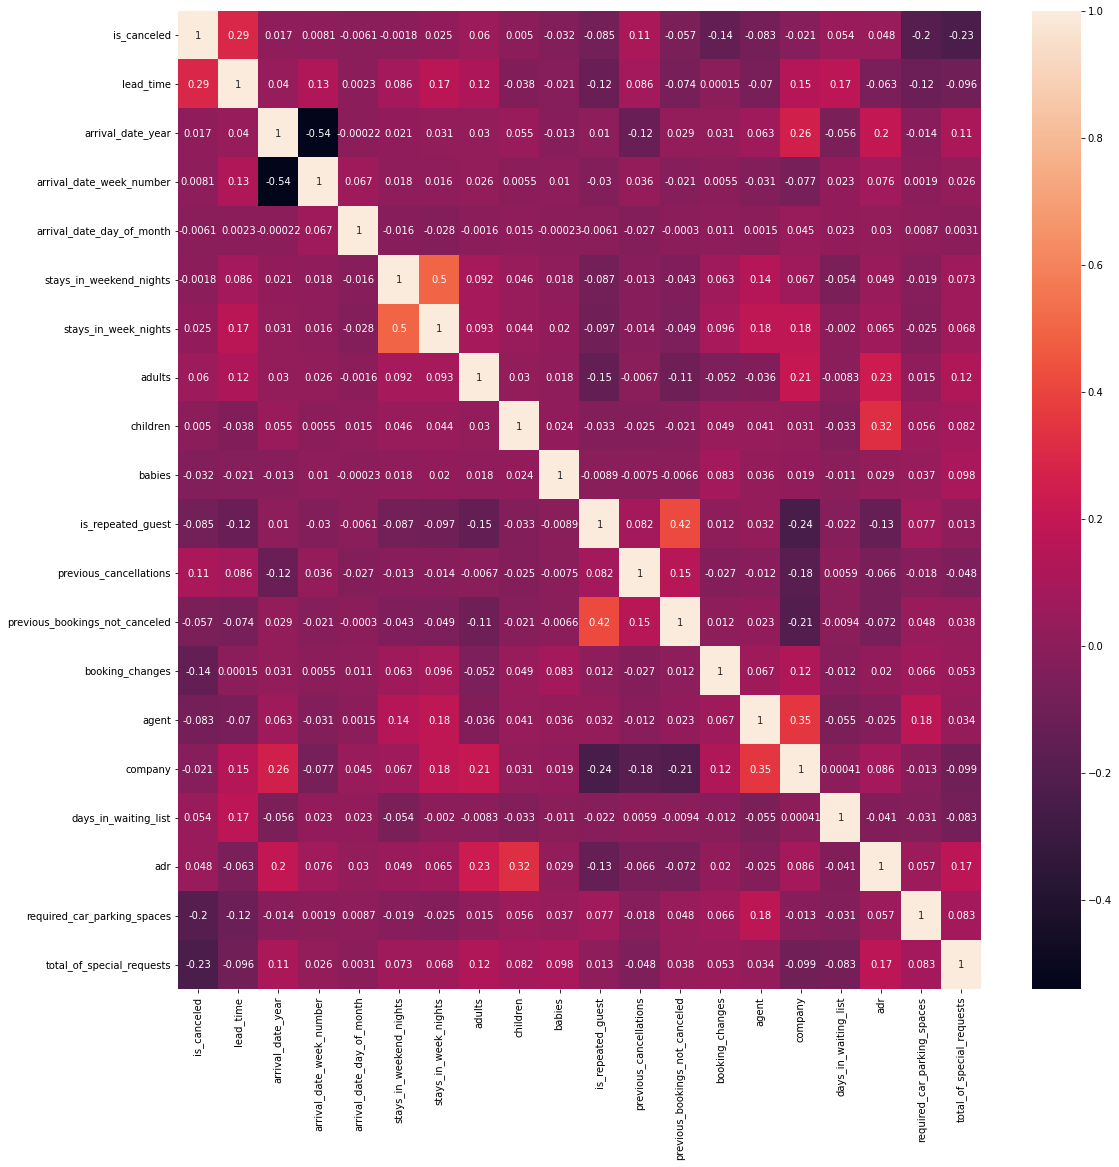

In [34]:
plt.figure(figsize=(18,18))
sns.heatmap(Data_df.corr(),annot=True)